In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv('cars.csv')

In [3]:
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.1+ KB


In [5]:
# given dataset contains 15 columns and 205 records

In [6]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [7]:
num_col=df.select_dtypes(include=['int64','float64']).columns
num_col

Index(['symboling', 'width', 'height', 'engine-size', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [8]:
cat_col=df.select_dtypes(include=['O']).columns
cat_col

Index(['normalized-losses', 'make', 'fuel-type', 'body-style', 'drive-wheels',
       'engine-location', 'engine-type', 'horsepower'],
      dtype='object')

# Univariate analysis

In [9]:
df.describe()

,symboling,width,height,engine-size,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,65.907805,53.724878,126.907317,25.219512,30.751220,13227.478049
std,1.245307,2.145204,2.443522,41.642693,6.542142,6.886443,7902.651615
min,-2.000000,60.300000,47.800000,61.000000,13.000000,16.000000,5118.000000
25%,0.000000,64.100000,52.000000,97.000000,19.000000,25.000000,7788.000000
50%,1.000000,65.500000,54.100000,120.000000,24.000000,30.000000,10345.000000
75%,2.000000,66.900000,55.500000,141.000000,30.000000,34.000000,16500.000000
max,3.000000,72.300000,59.800000,326.000000,49.000000,54.000000,45400.000000


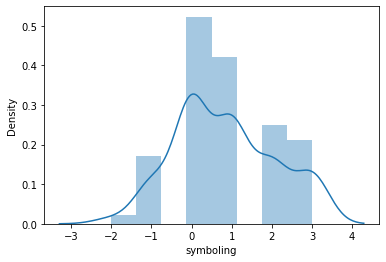

In [10]:
sns.distplot(df['symboling'])
plt.show()

In [11]:
# Symboling values lies between -2 to 3.
# average symboling is 0.83.|

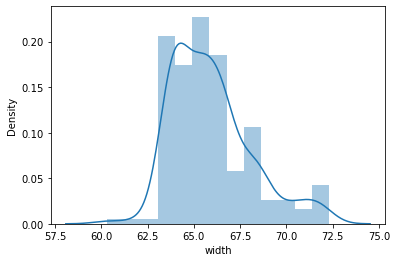

In [12]:
sns.distplot(df['width'])
plt.show()

In [13]:
# mean width = median width so the data is normally distributed
# Range for width is between 60 to 72.

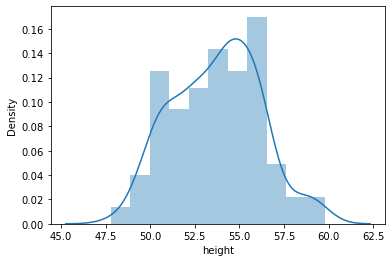

In [14]:
sns.distplot(df['height'])
plt.show()

In [15]:
# 

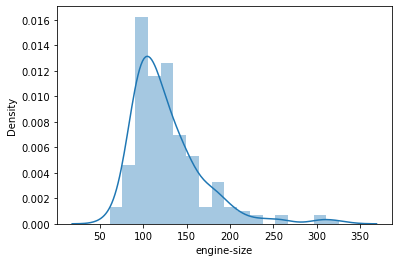

In [16]:
sns.distplot(df['engine-size'])
plt.show()

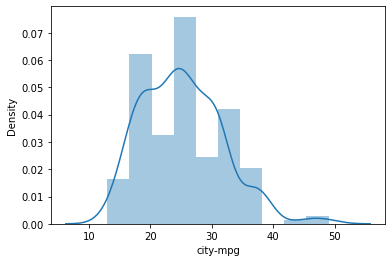

In [17]:
sns.distplot(df['city-mpg'])
plt.show()

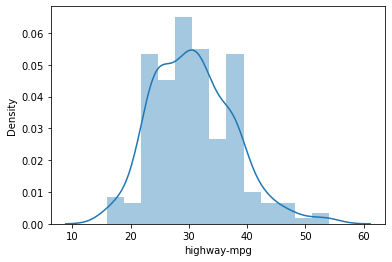

In [18]:
sns.distplot(df['highway-mpg'])
plt.show()

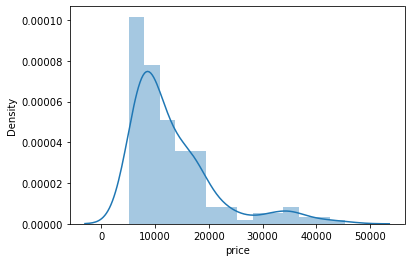

In [19]:
sns.distplot(df['price'])
plt.show()

In [20]:
# mean is greater than median so price is slightly right skewed
# the avg price of car is 13227.
# the range of cars price is 5118 to 45400

# outlier removal

<AxesSubplot:xlabel='price'>

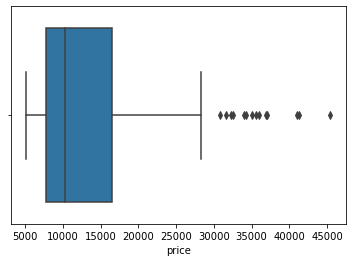

In [21]:
sns.boxplot(df['price'])

In [22]:
df['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [23]:
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [24]:
df['make'].value_counts()

toyota           32
nissan           18
mazda            17
honda            13
mitsubishi       13
subaru           12
volkswagen       12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
chevrolet         3
jaguar            3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64

<AxesSubplot:xlabel='price', ylabel='make'>

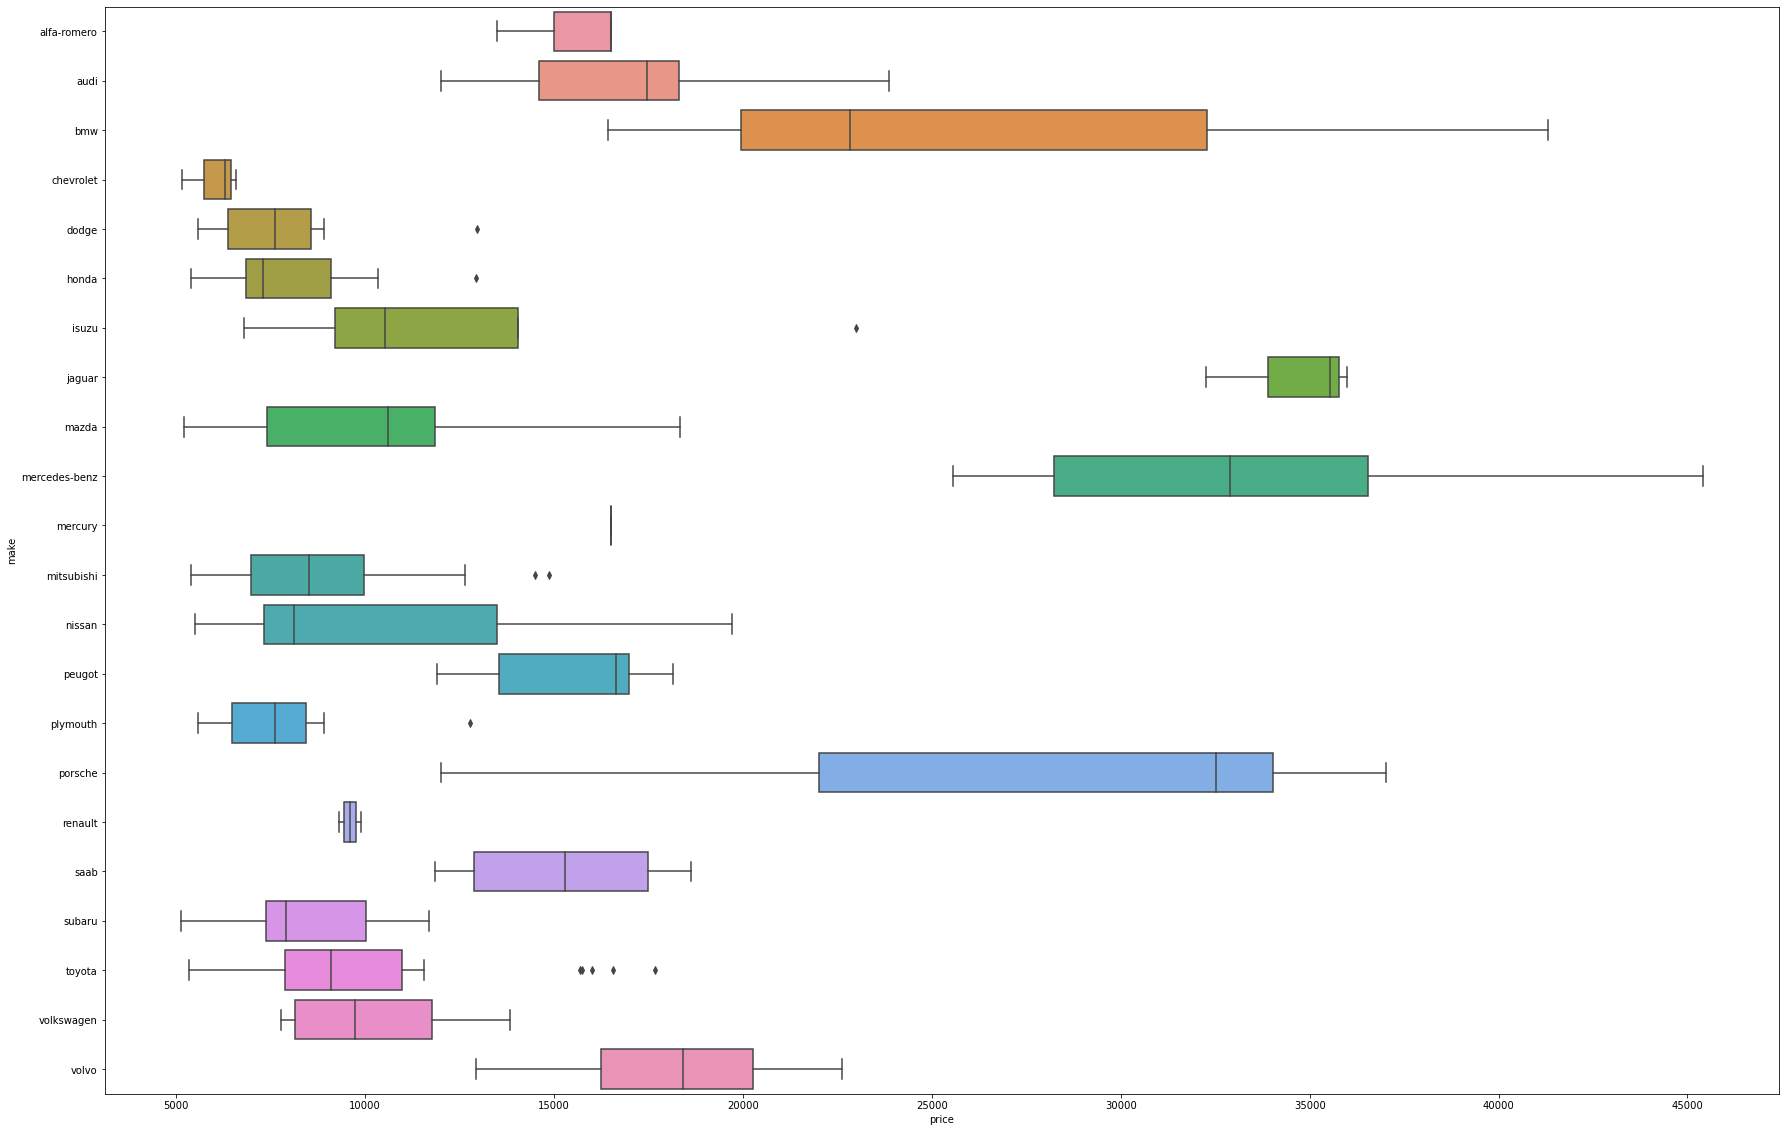

In [25]:
plt.figure(figsize=(30,20))
sns.boxplot(x='price',y='make',data=df)

In [26]:
df.loc[(df['make']=='toyota') & (df['price']>13000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
172,2,134,toyota,gas,convertible,rwd,front,65.6,53.0,ohc,146,116,24,30,17669
178,3,197,toyota,gas,hatchback,rwd,front,67.7,52.0,dohc,171,161,20,24,16558
179,3,197,toyota,gas,hatchback,rwd,front,67.7,52.0,dohc,171,161,19,24,15998
180,-1,90,toyota,gas,sedan,rwd,front,66.5,54.1,dohc,171,156,20,24,15690
181,-1,?,toyota,gas,wagon,rwd,front,66.5,54.1,dohc,161,156,19,24,15750


In [27]:
df.drop(index=[172,178,179,180,181],inplace=True)

In [28]:
df.loc[(df['make']=='plymouth') & (df['price']>10000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
124,3,?,plymouth,gas,hatchback,rwd,front,66.3,50.2,ohc,156,145,19,24,12764


In [29]:
df.drop(index=[124],inplace=True)

In [30]:
df.loc[(df['make']=='mitsubishi') & (df['price']>13000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
83,3,?,mitsubishi,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145,19,24,14869
84,3,?,mitsubishi,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145,19,24,14489


In [31]:
df.drop(index=[83,84],inplace=True)

In [32]:
df.loc[(df['make']=='isuzu') & (df['price']>20000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
45,0,?,isuzu,gas,sedan,fwd,front,63.6,52.0,ohc,90,70,38,43,23000


In [33]:
df.drop(index=[45],inplace=True)

In [34]:
df.loc[(df['make']=='honda') & (df['price']>11000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
41,0,85,honda,gas,sedan,fwd,front,65.2,54.1,ohc,110,101,24,28,12945


In [35]:
df.drop(index=[41],inplace=True)

In [36]:
df.loc[(df['make']=='dodge') & (df['price']>11000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
29,3,145,dodge,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145,19,24,12964


In [37]:
df.drop(index=[29],inplace=True)

<AxesSubplot:xlabel='price', ylabel='make'>

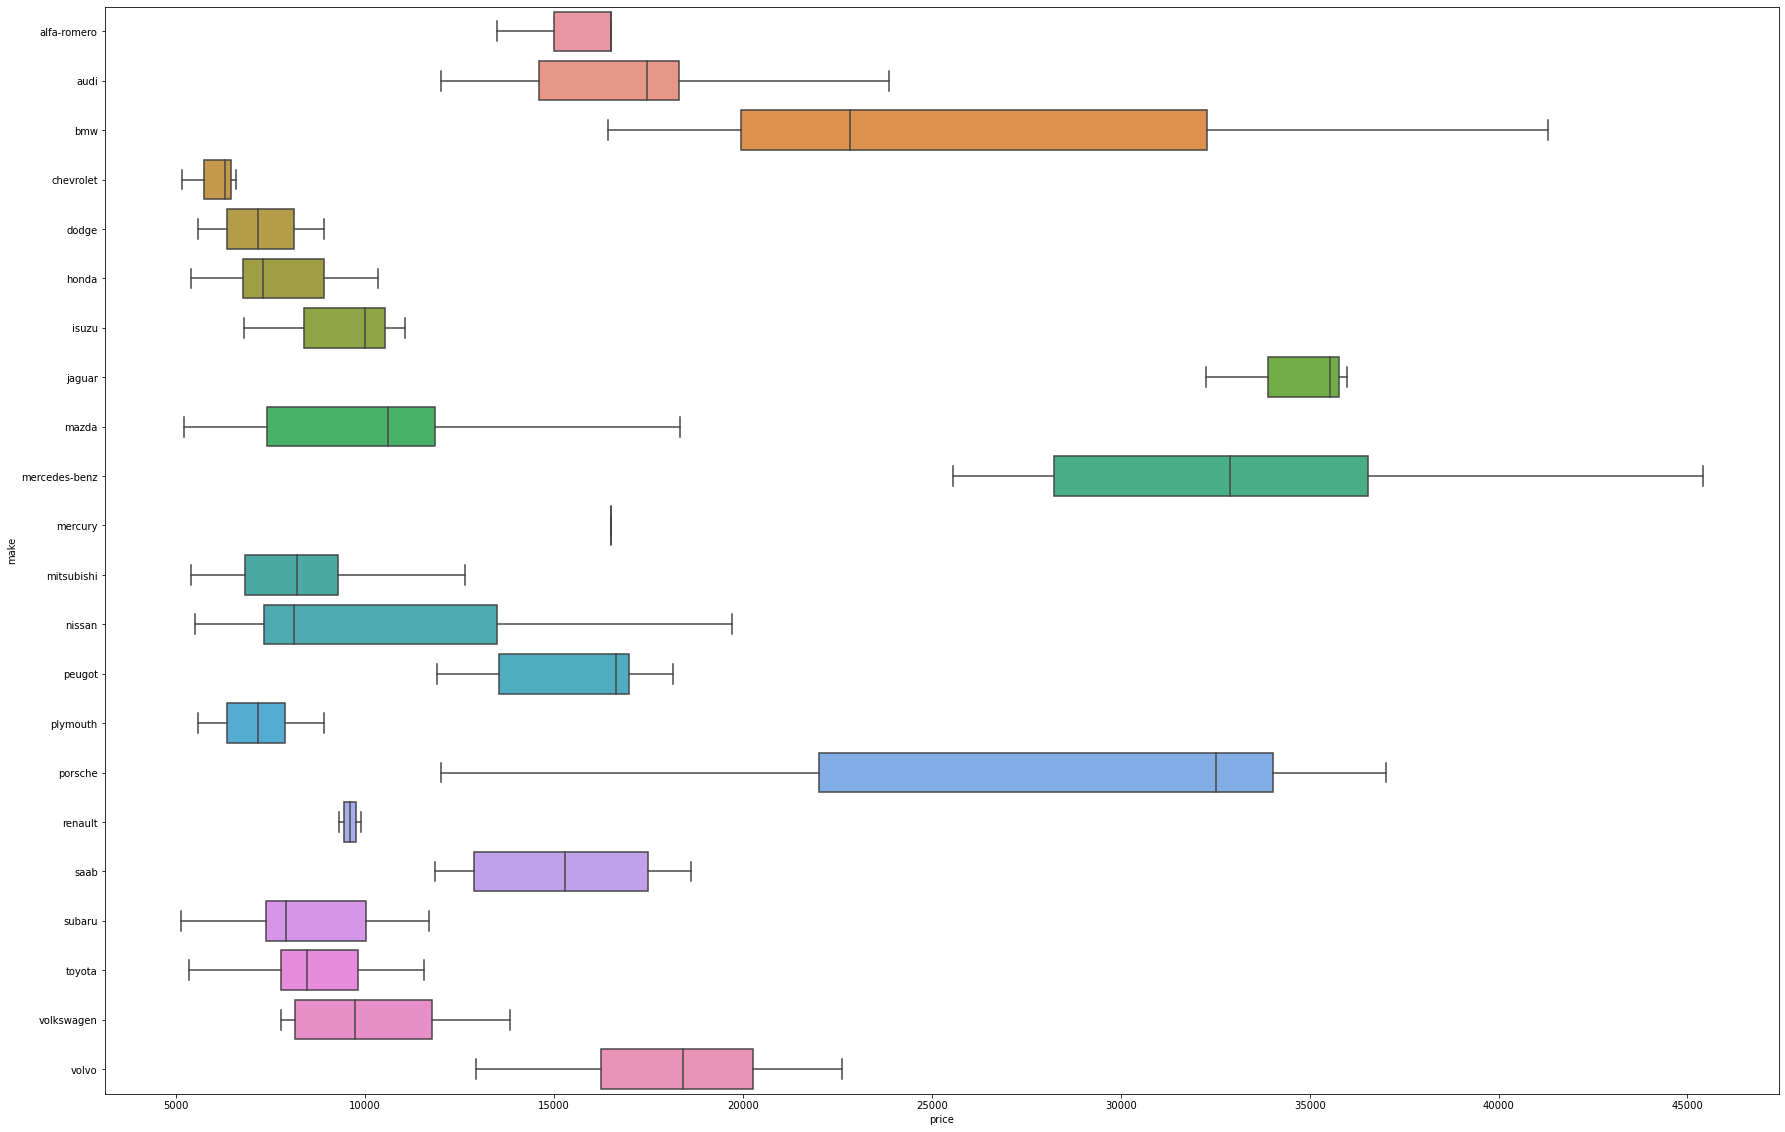

In [38]:
plt.figure(figsize=(30,20))
sns.boxplot(x='price',y='make',data=df)

In [39]:
df.reset_index(drop=True,inplace=True)

In [40]:
df

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114,23,28,16845
190,-1,95,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160,19,25,19045
191,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134,18,23,21485
192,-1,95,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106,26,27,22470


# Handling Categorical Columns

In [41]:
cat_col

Index(['normalized-losses', 'make', 'fuel-type', 'body-style', 'drive-wheels',
       'engine-location', 'engine-type', 'horsepower'],
      dtype='object')

In [42]:
df['normalized-losses'].unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '137', '101', '78', '106', '85', '107', '145', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '94',
       '256', '95'], dtype=object)

In [43]:
df['normalized-losses']=df['normalized-losses'].replace('?',np.nan)

In [44]:
df.isnull().sum()/len(df)*100

symboling             0.000000
normalized-losses    18.556701
make                  0.000000
fuel-type             0.000000
body-style            0.000000
drive-wheels          0.000000
engine-location       0.000000
width                 0.000000
height                0.000000
engine-type           0.000000
engine-size           0.000000
horsepower            0.000000
city-mpg              0.000000
highway-mpg           0.000000
price                 0.000000
dtype: float64

In [45]:
df['normalized-losses']=df['normalized-losses'].astype('float')

In [46]:
df['normalized-losses']=df['normalized-losses'].fillna(df['normalized-losses'].mean())

In [47]:
df['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [48]:
df['fuel-type'].unique()

array(['gas', 'diesel'], dtype=object)

In [49]:
df['horsepower'].unique()

array(['111', '154', '102', '115', '110', '140', '160', '101', '121',
       '182', '48', '70', '68', '88', '58', '76', '60', '86', '100', '78',
       '90', '176', '262', '135', '84', '64', '120', '72', '123', '155',
       '184', '175', '116', '145', '69', '55', '97', '152', '200', '95',
       '142', '143', '207', '288', '?', '73', '82', '94', '62', '56',
       '112', '92', '52', '85', '114', '162', '134', '106'], dtype=object)

In [50]:
df['horsepower']=df['horsepower'].replace('?',np.nan)

In [51]:
df['horsepower']=df['horsepower'].astype('float')

In [52]:
df.isnull().sum()/len(df)*100

symboling            0.000000
normalized-losses    0.000000
make                 0.000000
fuel-type            0.000000
body-style           0.000000
drive-wheels         0.000000
engine-location      0.000000
width                0.000000
height               0.000000
engine-type          0.000000
engine-size          0.000000
horsepower           1.030928
city-mpg             0.000000
highway-mpg          0.000000
price                0.000000
dtype: float64

In [53]:
df.dropna(inplace=True)

In [54]:
df.isnull().sum()/len(df)*100

symboling            0.0
normalized-losses    0.0
make                 0.0
fuel-type            0.0
body-style           0.0
drive-wheels         0.0
engine-location      0.0
width                0.0
height               0.0
engine-type          0.0
engine-size          0.0
horsepower           0.0
city-mpg             0.0
highway-mpg          0.0
price                0.0
dtype: float64

In [55]:
cat_col=df.select_dtypes(include=['O']).columns

In [56]:
cat_col

Index(['make', 'fuel-type', 'body-style', 'drive-wheels', 'engine-location',
       'engine-type'],
      dtype='object')

In [57]:
for i in cat_col:
    print('Column Name :-',i)
    print(df[i].unique())

Column Name :- make
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']
Column Name :- fuel-type
['gas' 'diesel']
Column Name :- body-style
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
Column Name :- drive-wheels
['rwd' 'fwd' '4wd']
Column Name :- engine-location
['front' 'rear']
Column Name :- engine-type
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']


# Univariate analysis of Categorical columns

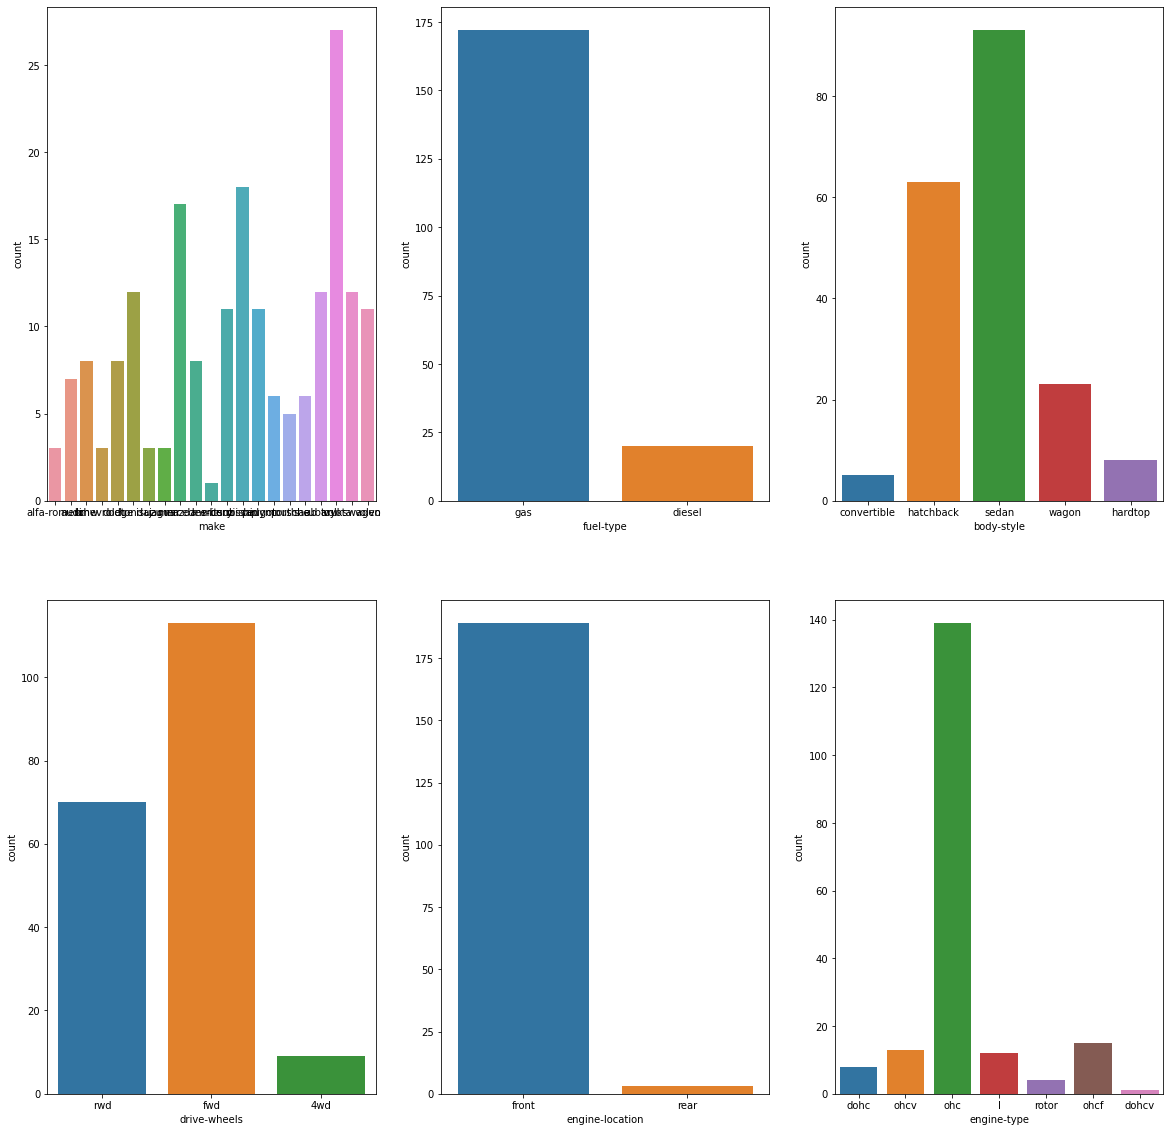

In [58]:
plt.figure(figsize=(20,20))
count=1
for i in cat_col:
    plt.subplot(2,3,count)
    sns.countplot(df[i])
    count+=1
plt.savefig('countplot_car.jpg')
plt.show()

# Bivariate analysis of cat columns with target column

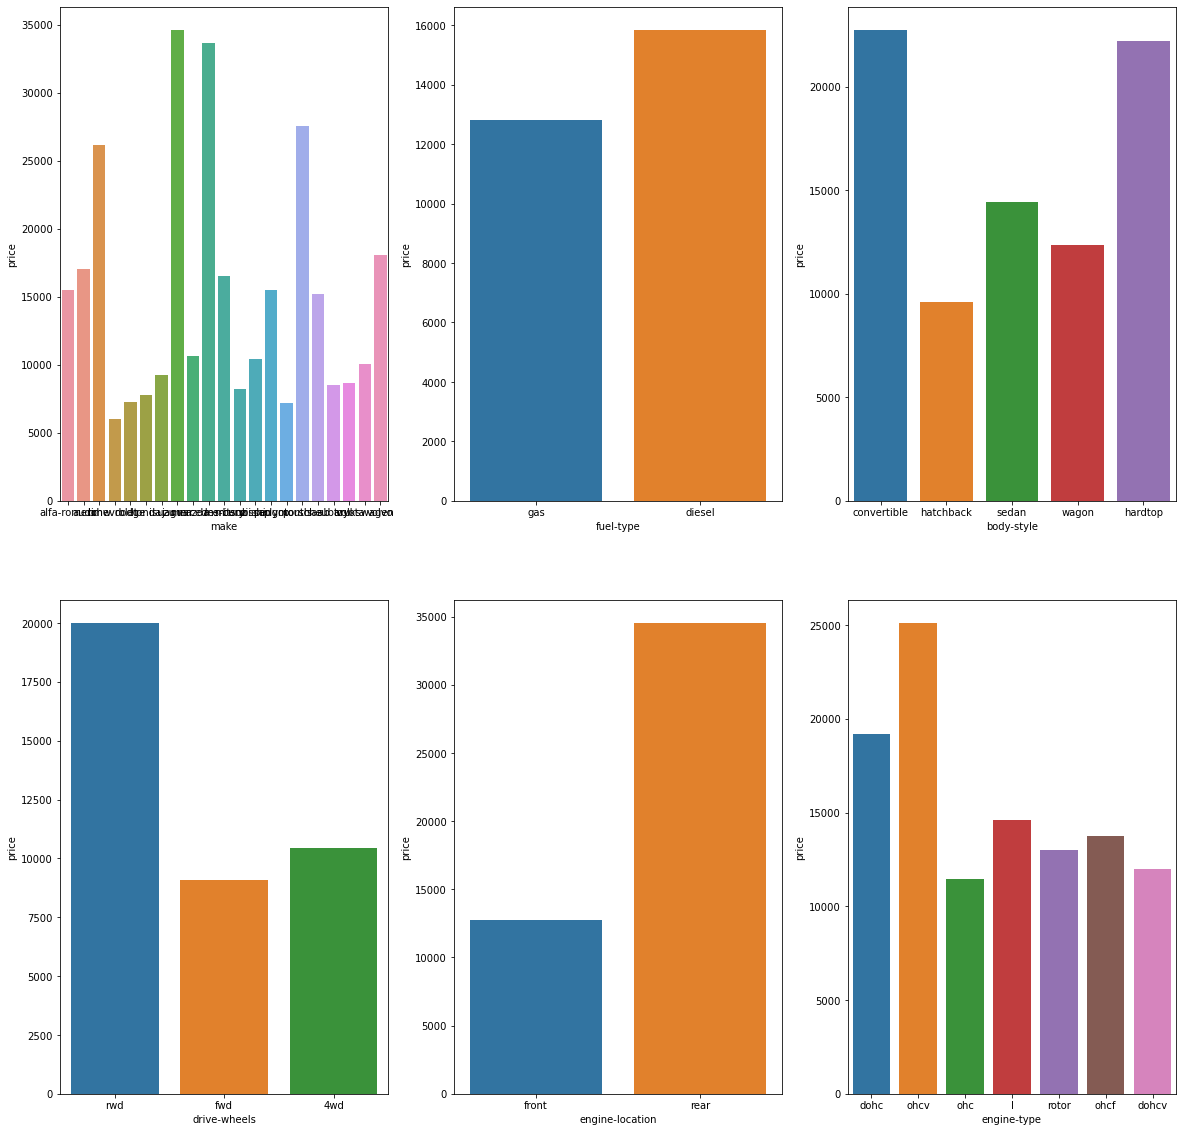

In [59]:
plt.figure(figsize=(20,20))
count=1
for i in cat_col:
    plt.subplot(2,3,count)
    sns.barplot(data=df,x=i,y='price',ci=False)
    count+=1
plt.savefig('barplot_car.jpg')
plt.show()

# Bivariate analysis of Numerical Columns

In [60]:
num_col=df.select_dtypes(include=['int64','float64']).columns
num_col

Index(['symboling', 'normalized-losses', 'width', 'height', 'engine-size',
       'horsepower', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

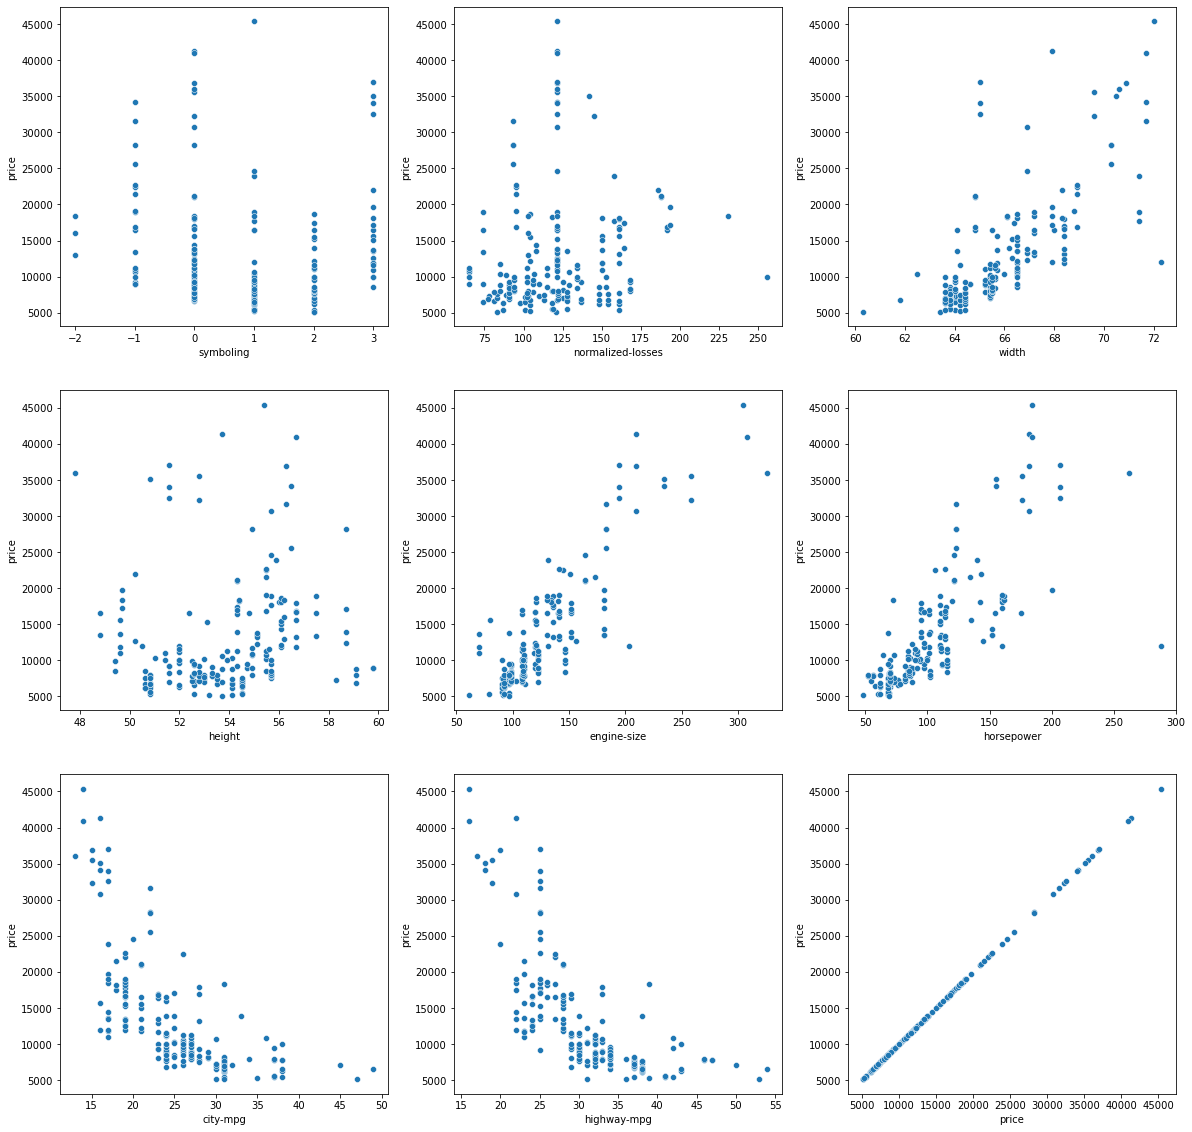

In [61]:
plt.figure(figsize=(20,20))
count=1
for i in num_col:
    plt.subplot(3,3,count)
    sns.scatterplot(data=df,x=i,y='price',ci=False)
    count+=1
plt.savefig('scatterplot_car.jpg')
plt.show()

# Multivariate Analysis

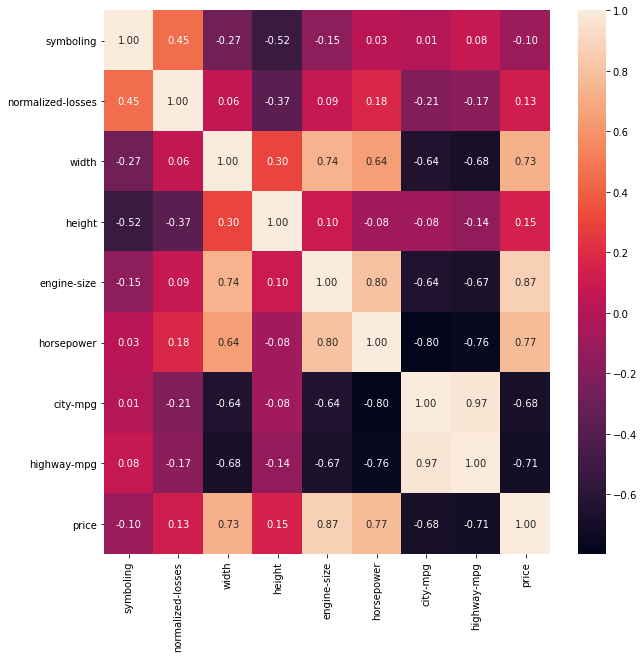

In [62]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.2f')
plt.show()

<Figure size 1440x1440 with 0 Axes>

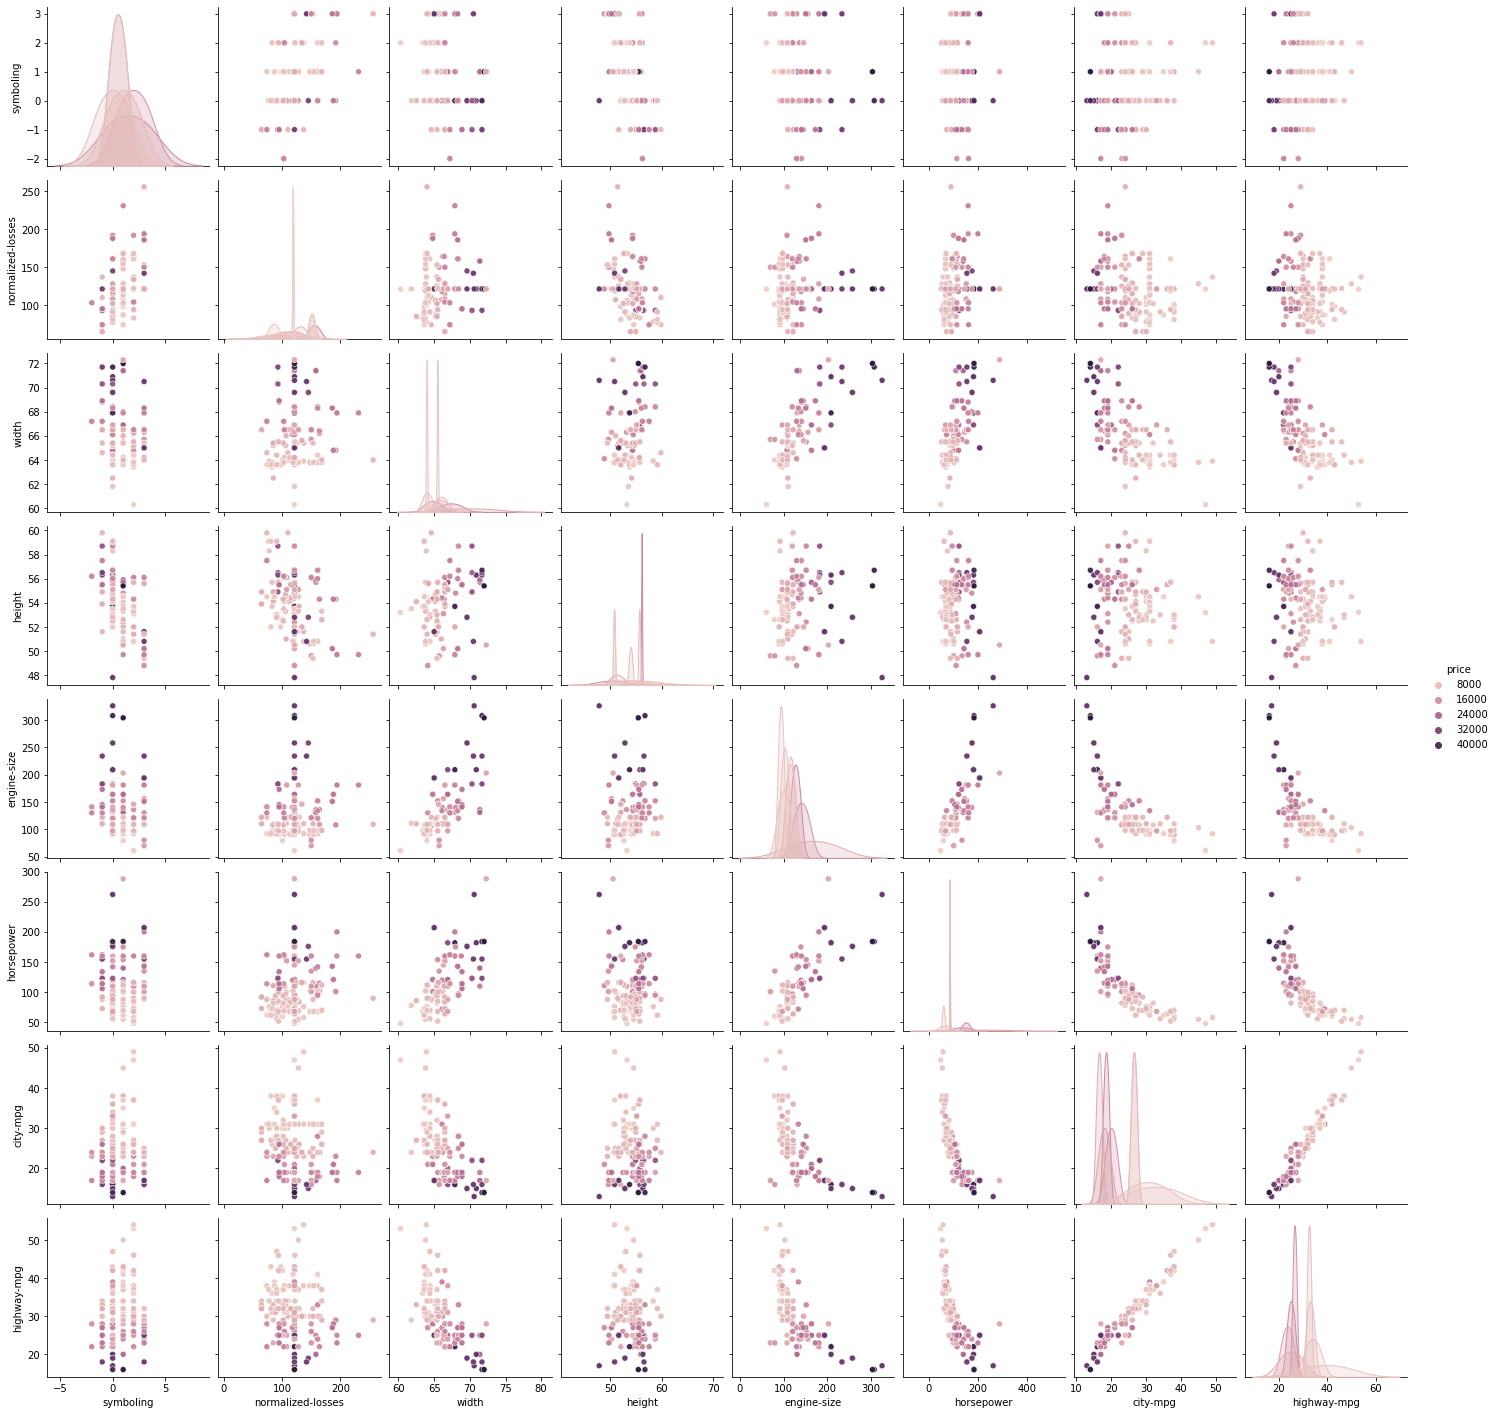

In [63]:
plt.figure(figsize=(20,20))
sns.pairplot(df,hue='price')
plt.show()

# Encoding

In [64]:
cat_col

Index(['make', 'fuel-type', 'body-style', 'drive-wheels', 'engine-location',
       'engine-type'],
      dtype='object')

In [65]:
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,121.265823,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,13495
1,3,121.265823,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,16500
2,1,121.265823,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26,16500
3,2,164.000000,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30,13950
4,2,164.000000,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22,17450


In [66]:
from sklearn.preprocessing import LabelEncoder

In [67]:
le=LabelEncoder()

In [68]:
df['make']=le.fit_transform(df['make'])

In [69]:
df['fuel-type']=le.fit_transform(df['fuel-type'])

In [70]:
df['body-style']=le.fit_transform(df['body-style'])

In [71]:
df['drive-wheels']=le.fit_transform(df['drive-wheels'])

In [72]:
df['engine-location']=le.fit_transform(df['engine-location'])

In [73]:
df['engine-type']=le.fit_transform(df['engine-type'])

In [74]:
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,121.265823,0,1,0,2,0,64.1,48.8,0,130,111.0,21,27,13495
1,3,121.265823,0,1,0,2,0,64.1,48.8,0,130,111.0,21,27,16500
2,1,121.265823,0,1,2,2,0,65.5,52.4,5,152,154.0,19,26,16500
3,2,164.000000,1,1,3,1,0,66.2,54.3,3,109,102.0,24,30,13950
4,2,164.000000,1,1,3,0,0,66.4,54.3,3,136,115.0,18,22,17450


# Spliting data into features and target variable.

In [75]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [76]:
x

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
0,3,121.265823,0,1,0,2,0,64.1,48.8,0,130,111.0,21,27
1,3,121.265823,0,1,0,2,0,64.1,48.8,0,130,111.0,21,27
2,1,121.265823,0,1,2,2,0,65.5,52.4,5,152,154.0,19,26
3,2,164.000000,1,1,3,1,0,66.2,54.3,3,109,102.0,24,30
4,2,164.000000,1,1,3,0,0,66.4,54.3,3,136,115.0,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,-1,95.000000,20,1,3,2,0,68.9,55.5,3,141,114.0,23,28
190,-1,95.000000,20,1,3,2,0,68.8,55.5,3,141,160.0,19,25
191,-1,95.000000,20,1,3,2,0,68.9,55.5,5,173,134.0,18,23
192,-1,95.000000,20,0,3,2,0,68.9,55.5,3,145,106.0,26,27


In [77]:
y

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
189    16845
190    19045
191    21485
192    22470
193    22625
Name: price, Length: 192, dtype: int64

In [78]:
# x=df.drop(['price'],axis=1)
# y=df['price']

<AxesSubplot:>

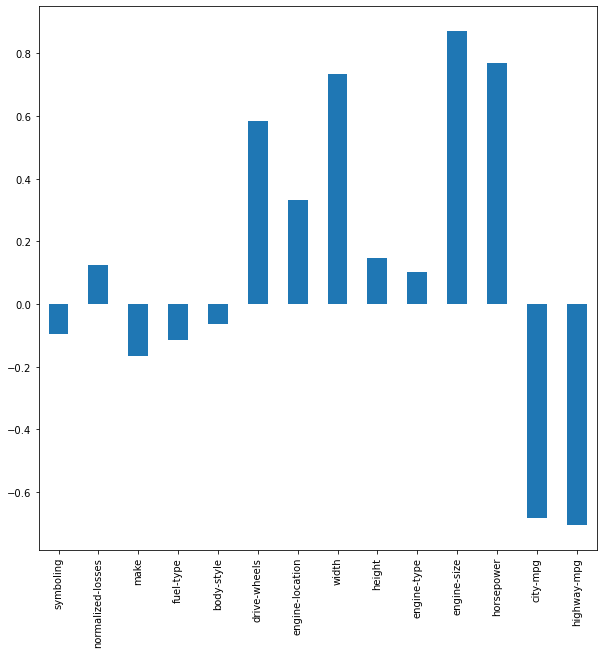

In [79]:
x.corrwith(y).plot.bar(figsize=(10,10))

# Spliting Dataset into train and test data

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=123)

In [82]:
x_train.shape

(153, 14)

In [83]:
x_test.shape

(39, 14)

In [84]:
y_train.shape

(153,)

In [85]:
y_test.shape

(39,)

In [86]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153 entries, 172 to 109
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          153 non-null    int64  
 1   normalized-losses  153 non-null    float64
 2   make               153 non-null    int32  
 3   fuel-type          153 non-null    int32  
 4   body-style         153 non-null    int32  
 5   drive-wheels       153 non-null    int32  
 6   engine-location    153 non-null    int32  
 7   width              153 non-null    float64
 8   height             153 non-null    float64
 9   engine-type        153 non-null    int32  
 10  engine-size        153 non-null    int64  
 11  horsepower         153 non-null    float64
 12  city-mpg           153 non-null    int64  
 13  highway-mpg        153 non-null    int64  
dtypes: float64(4), int32(6), int64(4)
memory usage: 14.3 KB


In [88]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [89]:
lr=LinearRegression()

In [90]:
lr.fit(x_train,y_train)

LinearRegression()

In [96]:
# predicting train data
y_pred_train=lr.predict(x_train)
# predicting test data
y_pred_test=lr.predict(x_test)

In [97]:
from sklearn.metrics import r2_score,mean_squared_error
def model_performance(y_actual,y_pred):
    r2=r2_score(y_actual,y_pred)
    rmse=np.sqrt(mean_squared_error(y_actual,y_pred))
    print('R2 score:{} | RMSE:{}'.format(round(r2,2),round(rmse,2)))

In [98]:
print('Training Performance')
model_performance(y_train,y_pred_train)
print('Testing Performance')
model_performance(y_test,y_pred_test)

Training Performance
R2 score:0.86 | RMSE:3126.71
Testing Performance
R2 score:0.87 | RMSE:2357.06


# Ridge

In [107]:
l2=Ridge(9)

In [108]:
l2.fit(x_train,y_train)

Ridge(alpha=9)

In [110]:
# predicting train data
y_pred_train=l2.predict(x_train)
# predicting test data
y_pred_test=l2.predict(x_test)

In [111]:
print('Training Performance')
model_performance(y_train,y_pred_train)
print('Testing Performance')
model_performance(y_test,y_pred_test)

Training Performance
R2 score:0.83 | RMSE:3411.52
Testing Performance
R2 score:0.89 | RMSE:2154.27


# Lasso

In [121]:
l1=Lasso(20)

In [122]:
l1.fit(x_train,y_train)

Lasso(alpha=20)

In [123]:
# predicting train data
y_pred_train=l1.predict(x_train)
# predicting test data
y_pred_test=l1.predict(x_test)

In [124]:
print('Training Performance')
model_performance(y_train,y_pred_train)
print('Testing Performance')
model_performance(y_test,y_pred_test)

Training Performance
R2 score:0.86 | RMSE:3132.21
Testing Performance
R2 score:0.88 | RMSE:2330.54


In [112]:
for i in range(1,250):
    l2=Ridge(i)
    l2.fit(x_train,y_train)
    print(f"{i}={l2.score(x_test,y_test)}")

1=0.8832711499797795
2=0.8869710349976788
3=0.8891041287920362
4=0.8905871862080414
5=0.8917246917399404
6=0.8926462269871149
7=0.8934174257722282
8=0.8940761377398077
9=0.8946464579690548
10=0.8951449293924812
11=0.8955835831233813
12=0.8959715605904185
13=0.8963160430881929
14=0.8966228180596042
15=0.8968966427907914
16=0.8971414889102532
17=0.8973607133572403
18=0.8975571820392951
19=0.8977333618858659
20=0.8978913910741061
21=0.8980331337265637
22=0.8981602232704042
23=0.8982740973256086
24=0.8983760261363292
25=0.8984671359938712
26=0.8985484287151719
27=0.8986207979731429
28=0.898685043085125
29=0.8987418807280372
30=0.8987919549472476
31=0.8988358457501185
32=0.8988740765173373
33=0.8989071204205603
34=0.8989354060001539
35=0.898959322029418
36=0.8989792217698737
37=0.898995426704689
38=0.8990082298231441
39=0.8990178985174807
40=0.8990246771440018
41=0.899028789292453
42=0.8990304398012124
43=0.8990298165504125
44=0.899027092060536
45=0.8990224249202364
46=0.899015961063872
47=

In [113]:
for i in range(1,250):
    l1=Lasso(i)
    l1.fit(x_train,y_train)
    print(f"{i}={l1.score(x_test,y_test)}")

1=0.8741043996300906
2=0.8742897635282105
3=0.8744300960441276
4=0.8745694967922709
5=0.8747079327969396
6=0.874845551478449
7=0.8749821047530207
8=0.8751179347981993
9=0.8752526357196854
10=0.8753868497058719
11=0.8755227067563187
12=0.8756574477109392
13=0.8757912267344123
14=0.8759240460805113
15=0.8760559036289456
16=0.8761868004417972
17=0.8763167373859719
18=0.8764455124713462
19=0.8765735217264817
20=0.8767005706411546
21=0.8768264460632228
22=0.8769515671425646
23=0.877075514425053
24=0.877198717786352
25=0.8773207391919956
26=0.8774420164121308
27=0.8775621063755188
28=0.8776814574800171
29=0.8777996145358212
30=0.8779170298807927
31=0.8780332485016885
32=0.8781487381113696
33=0.8782630248278464
34=0.8783765873034792
35=0.8784889411539651
36=0.8786003297534765
37=0.8787109976094281
38=0.8788204554307989
39=0.8789291959494896
40=0.8790367252866997
41=0.8791432899397824
42=0.8792491396958626
43=0.8793537734958732
44=0.879457692084577
45=0.8795603877467262
46=0.8796621186030783
4

In [114]:
from sklearn.model_selection import cross_val_score

In [115]:
l1_cv=cross_val_score(l1,x,y,cv=5)

In [116]:
l1_cv

array([0.81164262, 0.88515783, 0.10540992, 0.50070864, 0.36308505])

In [117]:
l1_cv.mean()

0.5332008114677519

In [118]:
l2_cv=cross_val_score(l2,x,y,cv=5)

In [119]:
l2_cv

array([0.81135827, 0.88759083, 0.11087345, 0.60741906, 0.40939064])

In [120]:
l2_cv.mean()

0.5653264500006518